In [7]:
#importing libraries
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
import pyodbc

In [8]:
#Checking for all the drivers available
for driver in pyodbc.drivers():
   print(driver)
    

SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server


In [9]:
#Establishing connection string for Sql server
server='TARUNJAIN-PC\SQLDVLPR2017'
database='AdventureWorks2022'
driver='ODBC Driver 17 for SQL Server'
database_con=f'mssql://@{server}/{database}?Driver={driver}'



In [10]:
#create the SQLAlchemy engine
engine = create_engine(database_con)
conn = engine.connect()


C:\Users\tarun\AppData\Local\Temp\ipykernel_12260\3673687565.py:2: SAWarning: No driver name specified; this is expected by PyODBC when using DSN-less connections
  engine = create_engine(database_con)


In [24]:
#What are the regional sales in the best performing country?

df = pd.read_sql_query("SELECT cr.Name AS Country, SUM(st.SalesYTD - st.SalesLastYear) AS Revenue \
                        FROM Sales.SalesTerritory st JOIN Person.CountryRegion cr\
                        ON st.CountryRegionCode = cr.CountryRegionCode\
                        GROUP BY cr.Name ORDER BY cr.Name DESC",conn)
                       
print(df.to_string(index=False))


       Country      Revenue
 United States 7008555.2300
United Kingdom 3377081.9689
       Germany 2497252.5561
        France 2375858.5477
        Canada 1077840.2776
     Australia 3699265.9378


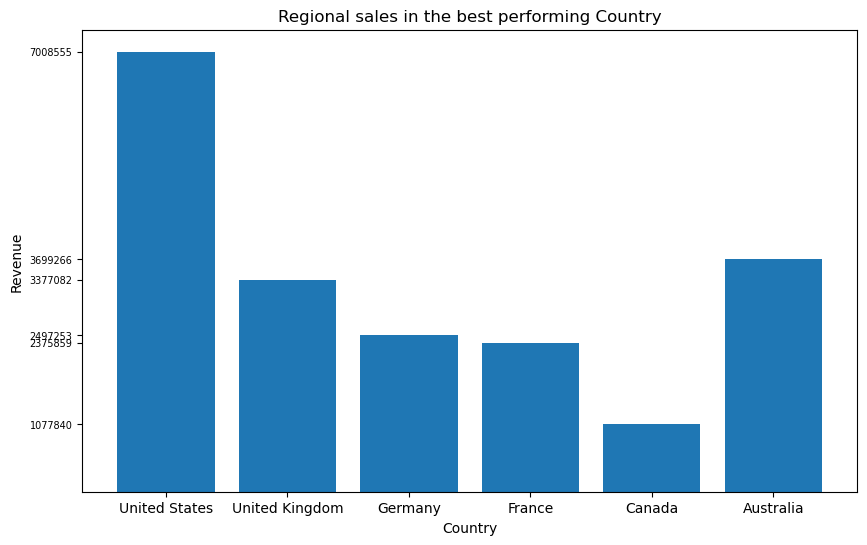

In [17]:
#What are the regional sales in the best performing country?

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(df["Country"], df["Revenue"])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.yticks(df["Revenue"], fontsize=7)
plt.title('Regional sales in the best performing Country')
plt.ticklabel_format(style='plain', axis='y')
plt.show()



In [18]:
# What is the relationship between Country and Revenue?

df = pd.read_sql_query("SELECT cr.Name AS Country, sum( cast(sod.LineTotal as integer)) as Revenue\
                        FROM Sales.SalesOrderDetail sod\
                        JOIN Sales.SalesOrderHeader soh\
                        ON sod.SalesOrderID = soh.SalesOrderID\
                        JOIN Sales.SalesTerritory st\
                        ON soh.TerritoryID = st.TerritoryID\
                        JOIN Person.CountryRegion cr\
                        ON st.CountryRegionCode = cr.CountryRegionCode\
                        GROUP BY cr.Name\
                        ORDER BY Revenue DESC",conn)
print(df.to_string(index=False))

       Country  Revenue
 United States 62956664
        Canada 16342517
     Australia 10644154
United Kingdom  7662939
        France  7244885
       Germany  4909705


C:\Users\tarun\AppData\Local\Temp\ipykernel_14996\1349237643.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df["Country"], fontsize=8, rotation=35)
C:\Users\tarun\AppData\Local\Temp\ipykernel_14996\1349237643.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["Revenue"][::-1], fontsize=8)


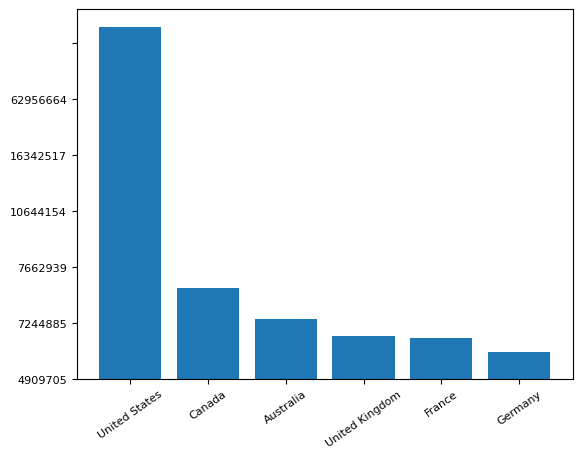

In [53]:
# What is the relationship between Country and Revenue?
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Plot your bar graph here
ax.bar(df["Country"], df["Revenue"],width=0.8)
# Customize y-axis tick labels

ax.set_xticklabels(df["Country"], fontsize=8, rotation=35)
ax.set_yticklabels(df["Revenue"][::-1], fontsize=8)

plt.show()

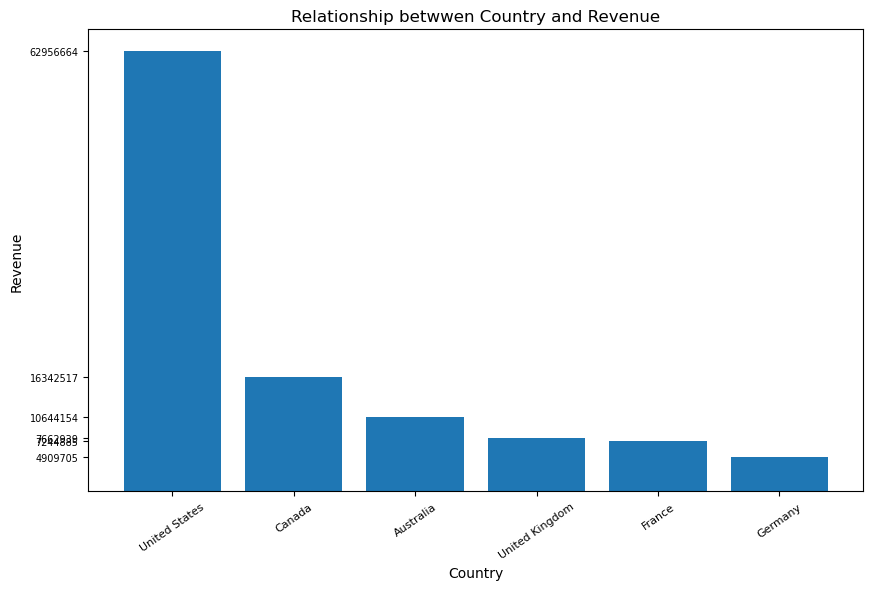

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(df["Country"], df["Revenue"])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(df["Country"], fontsize=8, rotation=35)
plt.yticks(df["Revenue"], fontsize=7)
plt.title("Relationship betwwen Country and Revenue")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [40]:
# What is the relationship between sick leave and Job Title (PersonType)?

df = pd.read_sql_query("SELECT p.PersonType, SUM(e.SickLeaveHours/8) as SickLeave\
                        FROM Person.Person p JOIN \
                        HumanResources.Employee e \
                        ON p.BusinessEntityID = e.BusinessEntityID \
                        GROUP BY p.PersonType",conn)
print(df.to_string(index=False))

PersonType  SickLeave
        EM       1451
        SP         63


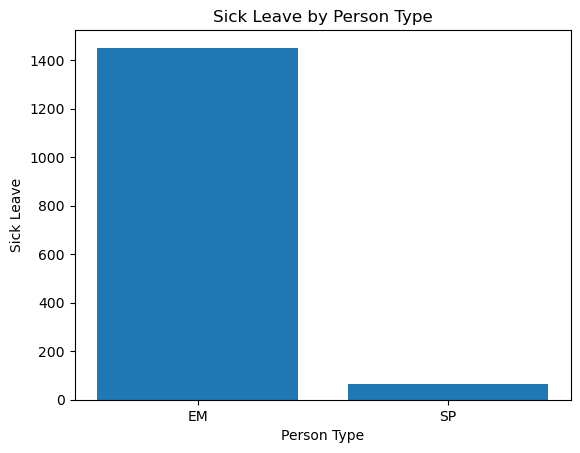

In [35]:
# Plot the data
import matplotlib.pyplot as plt
plt.bar(df['PersonType'], df['SickLeave'])

# Set labels and title
plt.xlabel('Person Type')
plt.ylabel('Sick Leave')
plt.title('Sick Leave by Person Type')

# Display the chart
plt.show()

In [28]:
# What is the relationship between sick leave and Job Title (PersonType)?

df = pd.read_sql_query("SELECT JobTitle, SUM(SickLeaveHours) AS SickLeaveInHours \
                        FROM HumanResources.Employee \
                        GROUP BY JobTitle \
                        ORDER BY SickLeaveInHours",conn)
print(df.to_string(index=False))

                                JobTitle  SickLeaveInHours
                 Chief Financial Officer                20
           Vice President of Engineering                20
                  Senior Design Engineer                21
                     Engineering Manager                21
                 Vice President of Sales                25
            North American Sales Manager                27
                   Pacific Sales Manager                30
                  European Sales Manager                30
                       Marketing Manager                40
              Production Control Manager                41
                        Master Scheduler                42
                      Purchasing Manager                44
                     Benefits Specialist                45
                         Finance Manager                47
                 Human Resources Manager                47
Assistant to the Chief Financial Officer                

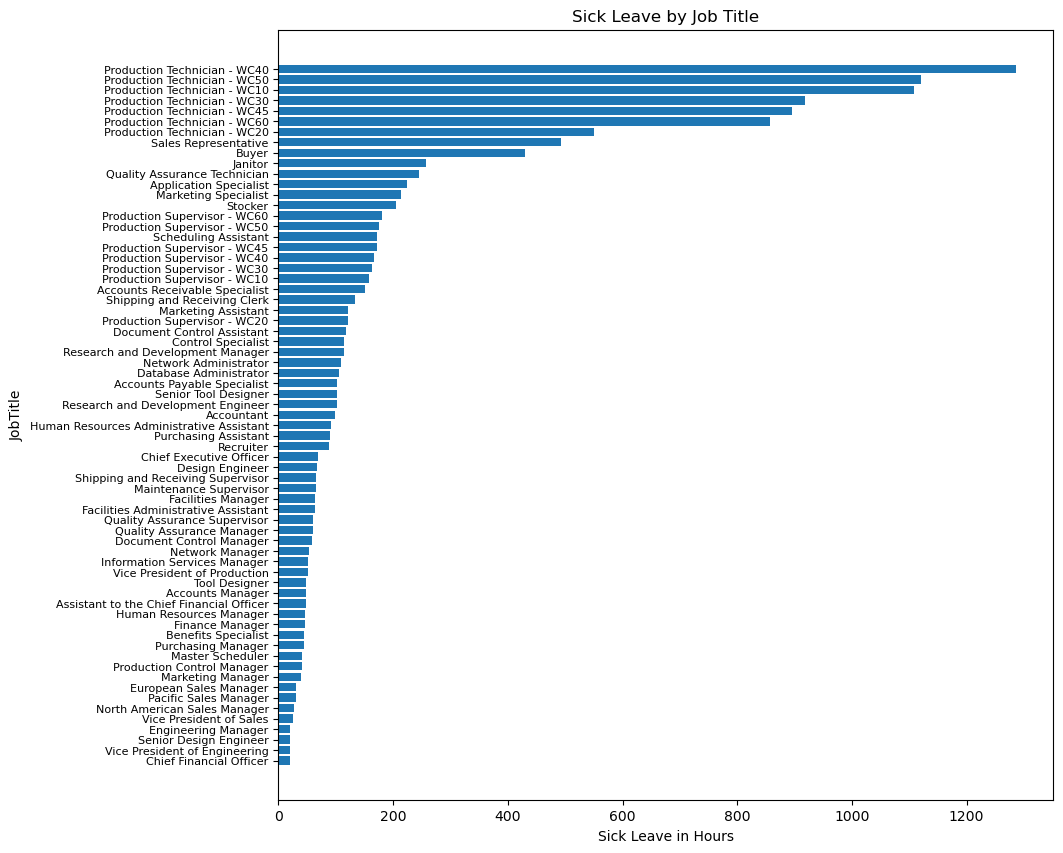

In [30]:
# What is the relationship between sick leave and Job Title (PersonType)?
plt.figure(figsize=(10,10))
plt.barh(df["JobTitle"], df["SickLeaveInHours"])
plt.xlabel("Sick Leave in Hours")
plt.ylabel("JobTitle")
plt.title("Sick Leave by Job Title")
plt.yticks(fontsize=8)

# Display the plot
plt.show()

In [12]:
# What is the relationship between the size of the stores, number of employees and revenue?

df = pd.read_sql_query("SELECT AVG(NumberEmployees) AS NumberOfEmployees, \
                        SquareFeet AS StoreSize,\
                        AVG(AnnualRevenue) AS Revenue \
                        FROM sales.vw_Store GROUP BY SquareFeet",conn)
print(df.to_string(index=False))


 NumberOfEmployees  StoreSize  Revenue
                 3       6000    30000
                 5       7000    30000
                 5       8000    30000
                 5       9000    30000
                 5      10000    30000
                 7      11000    30000
                10      17000    80000
                13      18000    80000
                15      19000    80000
                14      20000    80000
                14      21000    80000
                15      22000    80000
                18      23000    80000
                24      24000   100000
                24      25000   100000
                24      26000   100000
                23      27000   100000
                27      28000   100000
                32      35000   150000
                35      36000   150000
                38      37000   150000
                41      38000   150000
                39      39000   150000
                44      40000   150000
                45      4

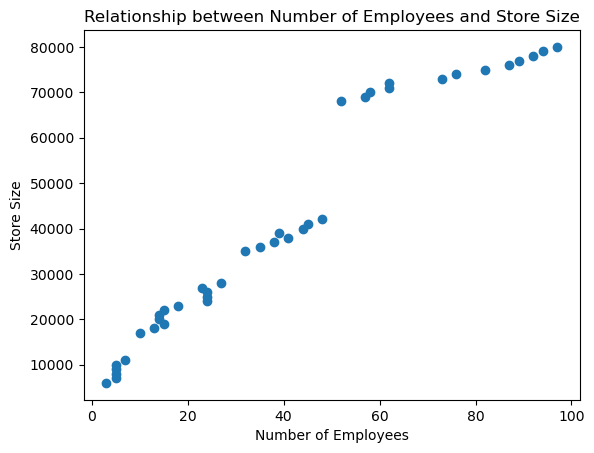

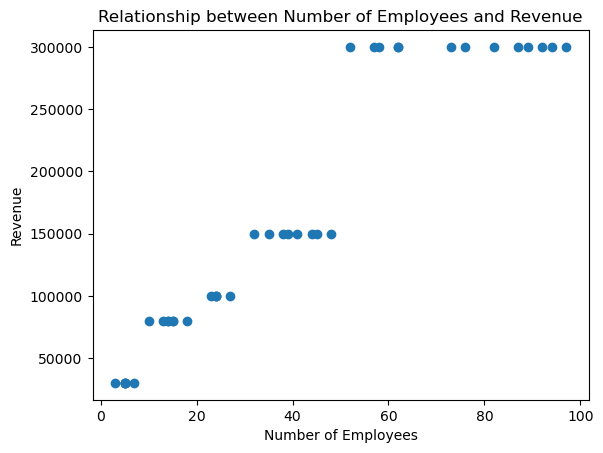

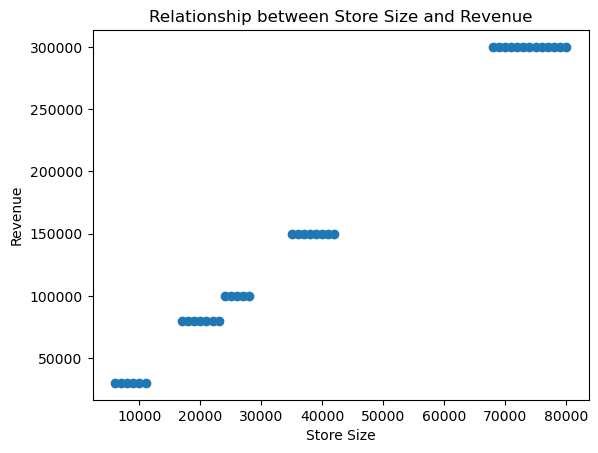

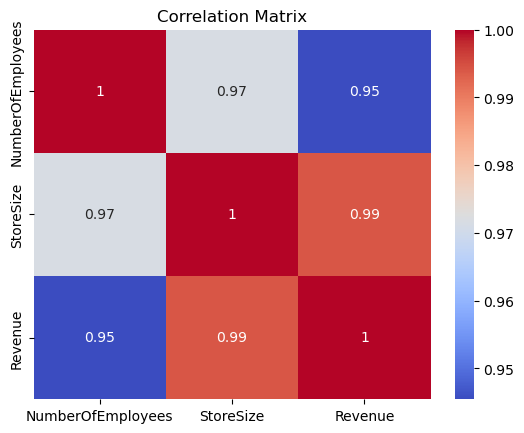

In [15]:
import matplotlib.pyplot as plt
# Scatter plot - NumberOfEmployees vs. StoreSize
plt.scatter(df["NumberOfEmployees"], df["StoreSize"])
plt.xlabel("Number of Employees")
plt.ylabel("Store Size")
plt.title("Relationship between Number of Employees and Store Size")
plt.show()

# Scatter plot - NumberOfEmployees vs. Revenue
plt.scatter(df["NumberOfEmployees"], df["Revenue"])
plt.xlabel("Number of Employees")
plt.ylabel("Revenue")
plt.title("Relationship between Number of Employees and Revenue")
plt.show()

# Scatter plot - StoreSize vs. Revenue
plt.scatter(df["StoreSize"], df["Revenue"])
plt.xlabel("Store Size")
plt.ylabel("Revenue")
plt.title("Relationship between Store Size and Revenue")
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [17]:
# What is the relationship between store trading duration and revenue?

df = pd.read_sql_query("Select SUM(AnnualRevenue)/COUNT(*) AS Revenue,\
                        YEAR(GETDATE()) - YearOpened AS StoreTradingDuration\
                        FROM sales.vw_store GROUP BY YEAR(GETDATE()) - YearOpened ",conn)
print(df.to_string(index=False))


 Revenue  StoreTradingDuration
  100000                    22
   90000                    23
  253333                    24
  231818                    25
  104500                    26
  157777                    27
  200000                    28
   98148                    29
  190000                    30
  222222                    31
  178000                    32
  143846                    33
  219230                    34
  106250                    35
  178461                    36
  222000                    37
  115000                    38
  137600                    39
  197368                    40
   70800                    41
  165000                    42
  222000                    43
  199200                    44
  137600                    45
  225000                    46
   70800                    47
  120800                    48
  222000                    49
   30000                    50
  171578                    51
  115789                    52
   45789

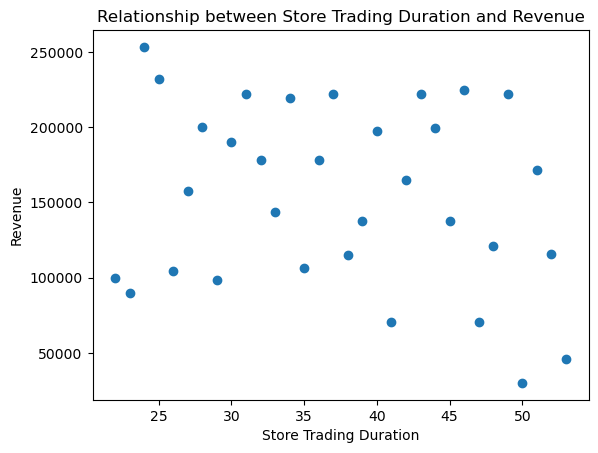

Correlation Coefficient: -0.22140258560478956


In [18]:

# Scatter plot - Revenue vs. StoreTradingDuration
plt.scatter(df["StoreTradingDuration"], df["Revenue"])
plt.xlabel("Store Trading Duration")
plt.ylabel("Revenue")
plt.title("Relationship between Store Trading Duration and Revenue")
plt.show()

# Correlation coefficient
correlation_coefficient = df["StoreTradingDuration"].corr(df["Revenue"])
print("Correlation Coefficient:", correlation_coefficient)

In [25]:
# What is the relationship between annual leave taken and bonus?
df = pd.read_sql_query("SELECT emp.JobTitle, emp.VacationHours, sp.Bonus\
                        FROM HumanResources.Employee AS emp \
                        JOIN Sales.SalesPerson AS sp \
                        ON emp.BusinessEntityID = sp.BusinessEntityID\
                        WHERE sp.Bonus <> 0\
                        ORDER BY emp.VacationHours",conn)
print(df.to_string(index=False))

            JobTitle  VacationHours  Bonus
Sales Representative             22 5000.0
Sales Representative             23 3500.0
Sales Representative             24 2500.0
Sales Representative             26 3550.0
Sales Representative             27 2000.0
Sales Representative             29 6700.0
Sales Representative             31 5000.0
Sales Representative             33  500.0
Sales Representative             34  985.0
Sales Representative             35   75.0
Sales Representative             36 5650.0
Sales Representative             37 5150.0
Sales Representative             38 4100.0
Sales Representative             39 3900.0


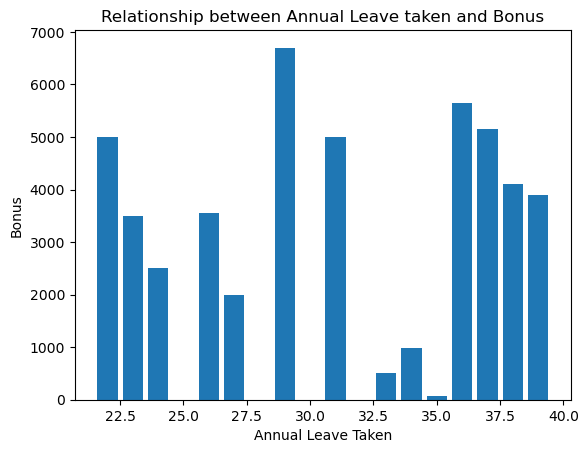

Correlation Coefficient: -0.04149372768799523


In [26]:
# What is the relationship between annual leave taken and bonus?
plt.bar(df["VacationHours"], df["Bonus"])
plt.xlabel("Annual Leave Taken")
plt.ylabel("Bonus")
plt.title("Relationship between Annual Leave taken and Bonus")
plt.show()

# Correlation coefficient
correlation_coefficient = df["VacationHours"].corr(df["Bonus"])
print("Correlation Coefficient:", correlation_coefficient)